In [1]:
from pyspark.sql import SQLContext, Row
import datetime

sqlContext = SQLContext(sc)
lines = sc.textFile('hdfs://localhost:9000/user/hqlgree2/ml-100k/u.data')
parts = lines.map(lambda l: l.split('\t'))
# userid, movieid, rating, unixtime
udata = parts.map(lambda u: Row(userid=int(u[0]),
                                movieid=int(u[1]),
                                rating=int(u[2]),
                                weekday=str(datetime.datetime.fromtimestamp(float(u[3])).isoweekday())))

schema = sqlContext.inferSchema(udata)
schema.registerTempTable('udata')

results = sqlContext.sql('select weekday, count(*) from udata group by weekday')
results.collect()

[Row(weekday=u'1', c1=12254),
 Row(weekday=u'2', c1=13579),
 Row(weekday=u'3', c1=14430),
 Row(weekday=u'4', c1=15114),
 Row(weekday=u'5', c1=14743),
 Row(weekday=u'6', c1=18229),
 Row(weekday=u'7', c1=11651)]

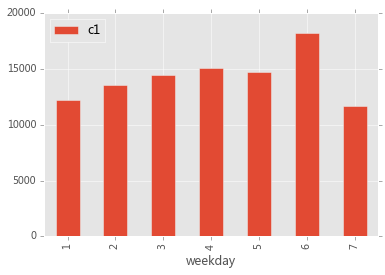

In [2]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
df = results.toPandas()
df.plot(kind='bar', x='weekday');

In [3]:
# results.saveAsParquetFile
schema.saveAsParquetFile("udata.parquet");